In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/dataset_3.csv")
data.head()

by_year = data[data["Group"] == "By Year"].reset_index()
by_month = data[data["Group"] == "By Month"].reset_index()
by_total = data[data["Group"] == "By Total"].reset_index()


In [8]:
by_year.head()

index  Data As Of  Start Date    End Date    Group    Year  Month  \
0  12420  04/02/2023  01/01/2020  12/31/2020  By Year  2020.0    NaN   
1  12421  04/02/2023  01/01/2021  12/31/2021  By Year  2021.0    NaN   
2  12422  04/02/2023  01/01/2022  12/31/2022  By Year  2022.0    NaN   
3  12423  04/02/2023  01/01/2023  04/01/2023  By Year  2023.0    NaN   
4  12424  04/02/2023  01/01/2020  12/31/2020  By Year  2020.0    NaN   

           State       Condition Group                Condition ICD10_codes  \
0  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
1  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
2  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
3  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
4  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   

  Age Group  COVID-19 Deaths  Number of Mentions Flag  
0      0-24            249.0               256.0  NaN  
1      0-24            893.0               933.0  NaN  
2      0-24            367.0               390.0  NaN  
3      0-24             25.0                28.0  NaN  
4     25-34           1112.0              1131.0  NaN

In [4]:
by_month.head()

index  Data As Of  Start Date    End Date     Group    Year  Month  \
0  62100  04/02/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
1  62101  04/02/2023  02/01/2020  02/29/2020  By Month  2020.0    2.0   
2  62102  04/02/2023  03/01/2020  03/31/2020  By Month  2020.0    3.0   
3  62103  04/02/2023  04/01/2020  04/30/2020  By Month  2020.0    4.0   
4  62104  04/02/2023  05/01/2020  05/31/2020  By Month  2020.0    5.0   

           State       Condition Group                Condition ICD10_codes  \
0  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
1  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
2  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
3  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
4  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   

  Age Group  COVID-19 Deaths  Number of Mentions Flag  
0      0-24              0.0                 0.0  NaN  
1      0-24              0.0                 0.0  NaN  
2      0-24              9.0                 9.0  NaN  
3      0-24             27.0                30.0  NaN  
4      0-24             19.0                19.0  NaN

In [5]:
by_total.head()

index  Data As Of  Start Date    End Date     Group  Year  Month  \
0      0  04/02/2023  01/01/2020  04/01/2023  By Total   NaN    NaN   
1      1  04/02/2023  01/01/2020  04/01/2023  By Total   NaN    NaN   
2      2  04/02/2023  01/01/2020  04/01/2023  By Total   NaN    NaN   
3      3  04/02/2023  01/01/2020  04/01/2023  By Total   NaN    NaN   
4      4  04/02/2023  01/01/2020  04/01/2023  By Total   NaN    NaN   

           State       Condition Group                Condition ICD10_codes  \
0  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
1  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
2  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
3  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   
4  United States  Respiratory diseases  Influenza and pneumonia     J09-J18   

  Age Group  COVID-19 Deaths  Number of Mentions Flag  
0      0-24           1534.0              1607.0  NaN  
1     25-34           5748.0              5966.0  NaN  
2     35-44          14974.0             15591.0  NaN  
3     45-54          37196.0             38651.0  NaN  
4     55-64          82032.0             85037.0  NaN

In [9]:
data['Age Group'].unique()

array(['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85+', 'Not stated', 'All Ages'], dtype=object)

In [6]:
data_by_age = by_total.groupby("Age Group").sum()
sns.barplot(data_by_age.drop("All Ages").drop("Not stated").reset_index(), x = "Age Group", y = "COVID-19 Deaths")
plt.title("Total Covid Deaths By Age Group")

/Users/martintoft/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'COVID-19 Deaths'

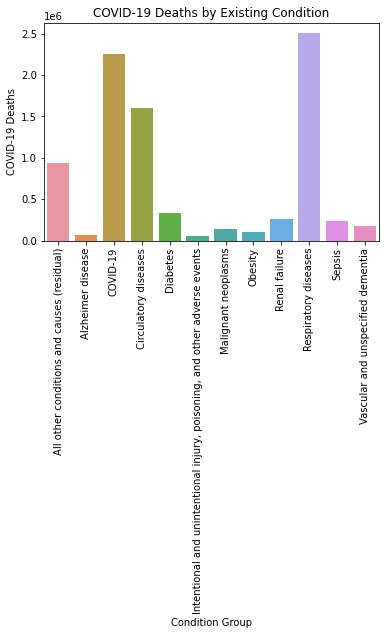

In [ ]:
conditions = by_total[by_total["Age Group"] == "All Ages"].groupby("Condition Group").sum().reset_index()
sns.barplot(x=conditions["Condition Group"], y=conditions["COVID-19 Deaths"])
plt.xticks(rotation=90)
plt.title("COVID-19 Deaths by Existing Condition")
plt.show()

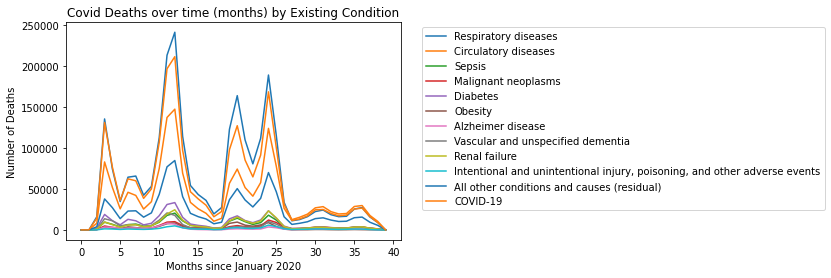

In [ ]:
for condition in by_month["Condition Group"].unique():
    temp = by_month.where(by_month["Condition Group"] == condition).where(by_month["Age Group"] == "All Ages").groupby(["Year", "Month"]).sum().reset_index().sort_values(["Year", "Month"])
    plt.plot(temp["COVID-19 Deaths"], label = condition)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Covid Deaths over time (months) by Existing Condition")
plt.ylabel("Number of Deaths")
plt.xlabel("Months since January 2020")
plt.show()